In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the raw dataset
df_raw = pd.read_csv('data/cryogenic_synthetic.csv', parse_dates=['Timestamp'])

In [4]:
# Display first few rows
df_raw.head()

,Timestamp,Temperature (°C),Anomaly
0,2025-01-01 00:00:00,-196.591030,0
1,2025-01-01 00:01:00,-196.523761,0
2,2025-01-01 00:02:00,-196.239408,0
3,2025-01-01 00:03:00,-195.293995,0
4,2025-01-01 00:04:00,-196.492203,0


In [5]:
# Check for missing and inconsistent data
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Timestamp         10000 non-null  datetime64[ns]
 1   Temperature (°C)  9950 non-null   float64       
 2   Anomaly           10000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 234.5 KB


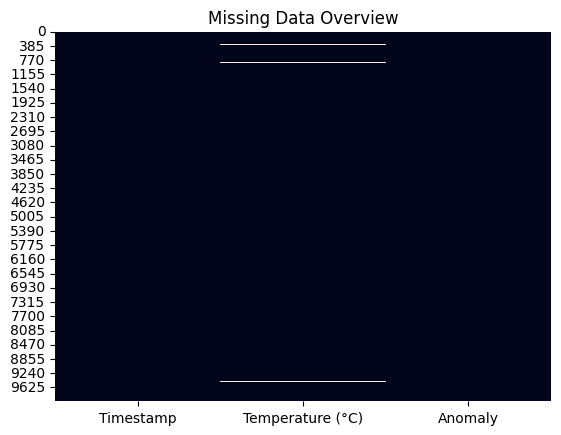

In [6]:
# Visualize missing data
sns.heatmap(df_raw.isnull(), cbar=False)
plt.title("Missing Data Overview")
plt.show()

In [8]:
df_raw['Temperature (°C)'] = df_raw['Temperature (°C)'].ffill()

In [9]:
# Ensure Anomaly column is binary (0 or 1)
df_raw['Anomaly'] = df_raw['Anomaly'].apply(lambda x: 0 if x < 0.5 else 1)

In [16]:
df_raw['Anomaly'].value_counts()

Anomaly
0    9900
1     100
Name: count, dtype: int64

In [10]:
# Save a copy before standardization for comparison
df_before_scaling = df_raw.copy()

In [11]:
# Standardize the Temperature column
scaler = StandardScaler()
df_raw['Temperature (°C)'] = scaler.fit_transform(df_raw[['Temperature (°C)']])

In [18]:
# Save cleaned and preprocessed dataset
df_raw.to_csv('data/cryogenic_synthetic_preprocessed.csv', index=False)

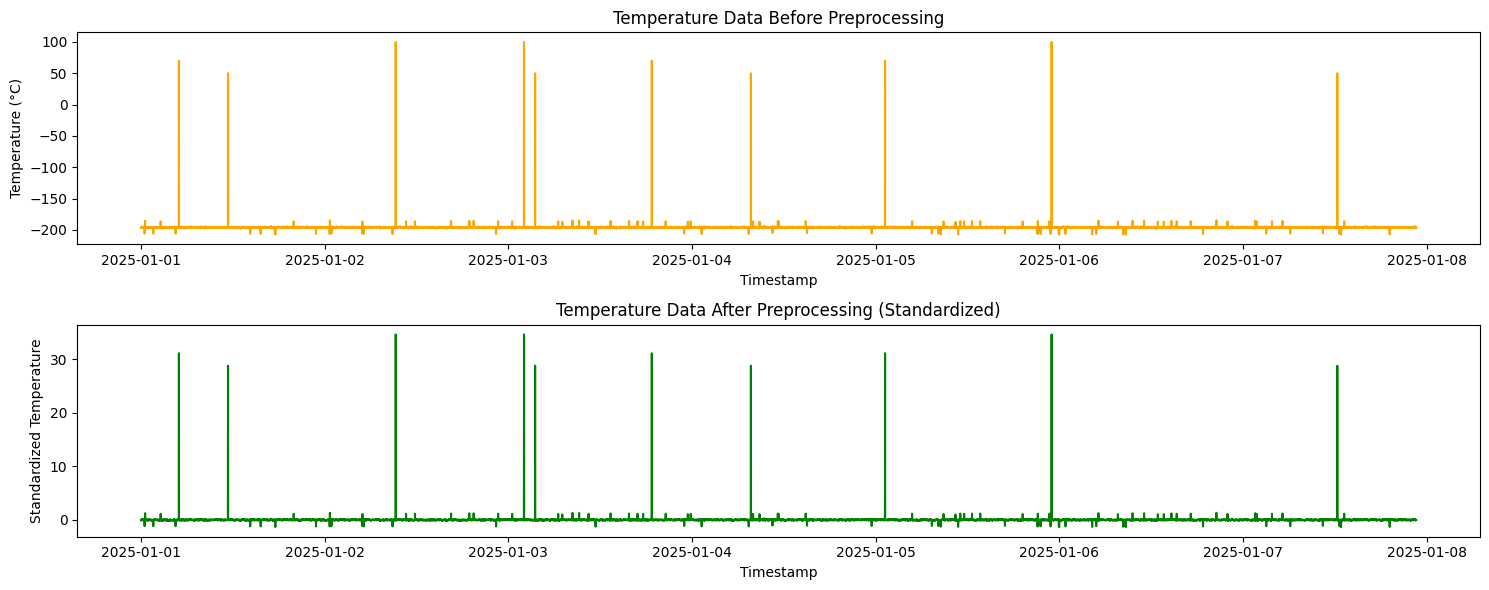

✅ Data preprocessing complete and comparison graph added.


In [20]:
# Comparison Graph: Before vs After Preprocessing
plt.figure(figsize=(15,6))

# Plot before preprocessing
plt.subplot(2,1,1)
plt.plot(df_before_scaling['Timestamp'], df_before_scaling['Temperature (°C)'], label='Before Preprocessing', color='orange')
plt.title('Temperature Data Before Preprocessing')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')

# Plot after preprocessing
plt.subplot(2,1,2)
plt.plot(df_raw['Timestamp'], df_raw['Temperature (°C)'], label='After Preprocessing', color='green')
plt.title('Temperature Data After Preprocessing (Standardized)')
plt.xlabel('Timestamp')
plt.ylabel('Standardized Temperature')

plt.tight_layout()
plt.show()

print("✅ Data preprocessing complete and comparison graph added.")